c:\Users\sonam\miniconda3\envs\tf310\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 184ms/step - accuracy: 0.5139 - loss: 0.6917 - val_accuracy: 0.5497 - val_loss: 0.6806
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 195ms/step - accuracy: 0.5724 - loss: 0.6755 - val_accuracy: 0.5811 - val_loss: 0.6739
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 77s 180ms/step - accuracy: 0.5649 - loss: 0.6833 - val_accuracy: 0.6013 - val_loss: 0.6512
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 172ms/step - accuracy: 0.6706 - loss: 0.6175 - val_accuracy: 0.7920 - val_loss: 0.5159
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 192ms/step - accuracy: 0.6582 - loss: 0.6201 - val_accuracy: 0.5000 - val_loss: 0.6535
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.5014 - loss: 0.6567

Test Accuracy: 0.5000


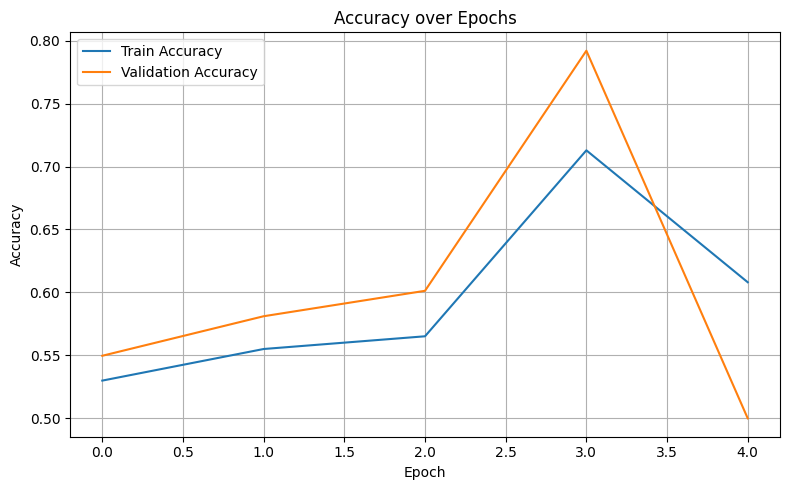

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step

Review: This movie was absolutely fantastic. The acting, the plot — all great!
Predicted Sentiment: Negative (0.50)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Review: I don't recommend it. Waste of time and money.
Predicted Sentiment: Negative (0.12)


In [3]:
# imdb_sentiment_rnn.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Load the dataset
df = pd.read_csv(r"C:\Users\sonam\Downloads\IMDB Dataset.csv\IMDB Dataset.csv")  # Ensure this file is in your working directory

# Step 2: Encode labels (positive = 1, negative = 0)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42
)

# Step 4: Text Tokenization and Padding
vocab_size = 10000
max_length = 200
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Step 5: Build the RNN model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Step 6: Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=5,
    batch_size=128,
    callbacks=[early_stop]
)

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Step 8: Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 9: Prediction function
def predict_review(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_length, padding='post')
    pred = model.predict(padded)[0][0]
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"\nReview: {text}\nPredicted Sentiment: {sentiment} ({pred:.2f})")

# Example predictions
predict_review("This movie was absolutely fantastic. The acting, the plot — all great!")
predict_review("I don't recommend it. Waste of time and money.")
